<a href="https://colab.research.google.com/github/Scyzentraz/modulajar/blob/main/Real%20Denoising%20Restormer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/swz30/Restormer.git
%cd Restormer

!pip install -r requirements.txt
!pip install timm --upgrade

Cloning into 'Restormer'...
remote: Enumerating objects: 309, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 309 (delta 67), reused 56 (delta 56), pack-reused 202 (from 1)
Receiving objects: 100% (309/309), 1.56 MiB | 21.58 MiB/s, done.
Resolving deltas: 100% (123/123), done.
/content/Restormer
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 1

In [ ]:

!mkdir -p Denoising/pretrained_models

!pip install gdown
!gdown https://drive.google.com/uc?id=1FF_4NTboTWQ7sHCq4xhyLZsSl0U0JfjH -O Denoising/pretrained_models/real_denoising.pth

Downloading...
From (original): https://drive.google.com/uc?id=1FF_4NTboTWQ7sHCq4xhyLZsSl0U0JfjH
From (redirected): https://drive.google.com/uc?id=1FF_4NTboTWQ7sHCq4xhyLZsSl0U0JfjH&confirm=t&uuid=f92371da-dab4-4370-b75f-659e1248032e
To: /content/Restormer/Denoising/pretrained_models/real_denoising.pth
100% 105M/105M [00:00<00:00, 193MB/s] 


In [ ]:
%cd /content/Restormer

/content/Restormer


In [25]:
# Bersihkan input
input_dir = './inputs'
if os.path.exists(input_dir):
    shutil.rmtree(input_dir)
os.makedirs(input_dir)

#Upload gambar
from google.colab import files
uploaded = files.upload()  # lalu upload manual
import shutil
shutil.move(list(uploaded.keys())[0], 'inputs/')

Saving 20250630_095343 (1) (1).png to 20250630_095343 (1) (1).png


'inputs/20250630_095343 (1) (1).png'

In [26]:
#eksekusi
# Bersihkan hasil output
result_dir = './results'
if os.path.exists(result_dir):
    shutil.rmtree(result_dir)
os.makedirs(result_dir)

#inference
!python demo.py --task Real_Denoising --input_dir ./inputs --result_dir ./results --tile 512 --tile_overlap 32


 ==> Running Real_Denoising with weights Denoising/pretrained_models/real_denoising.pth
 
100% 1/1 [00:10<00:00, 10.19s/it]

Restored images are saved at ./results/Real_Denoising


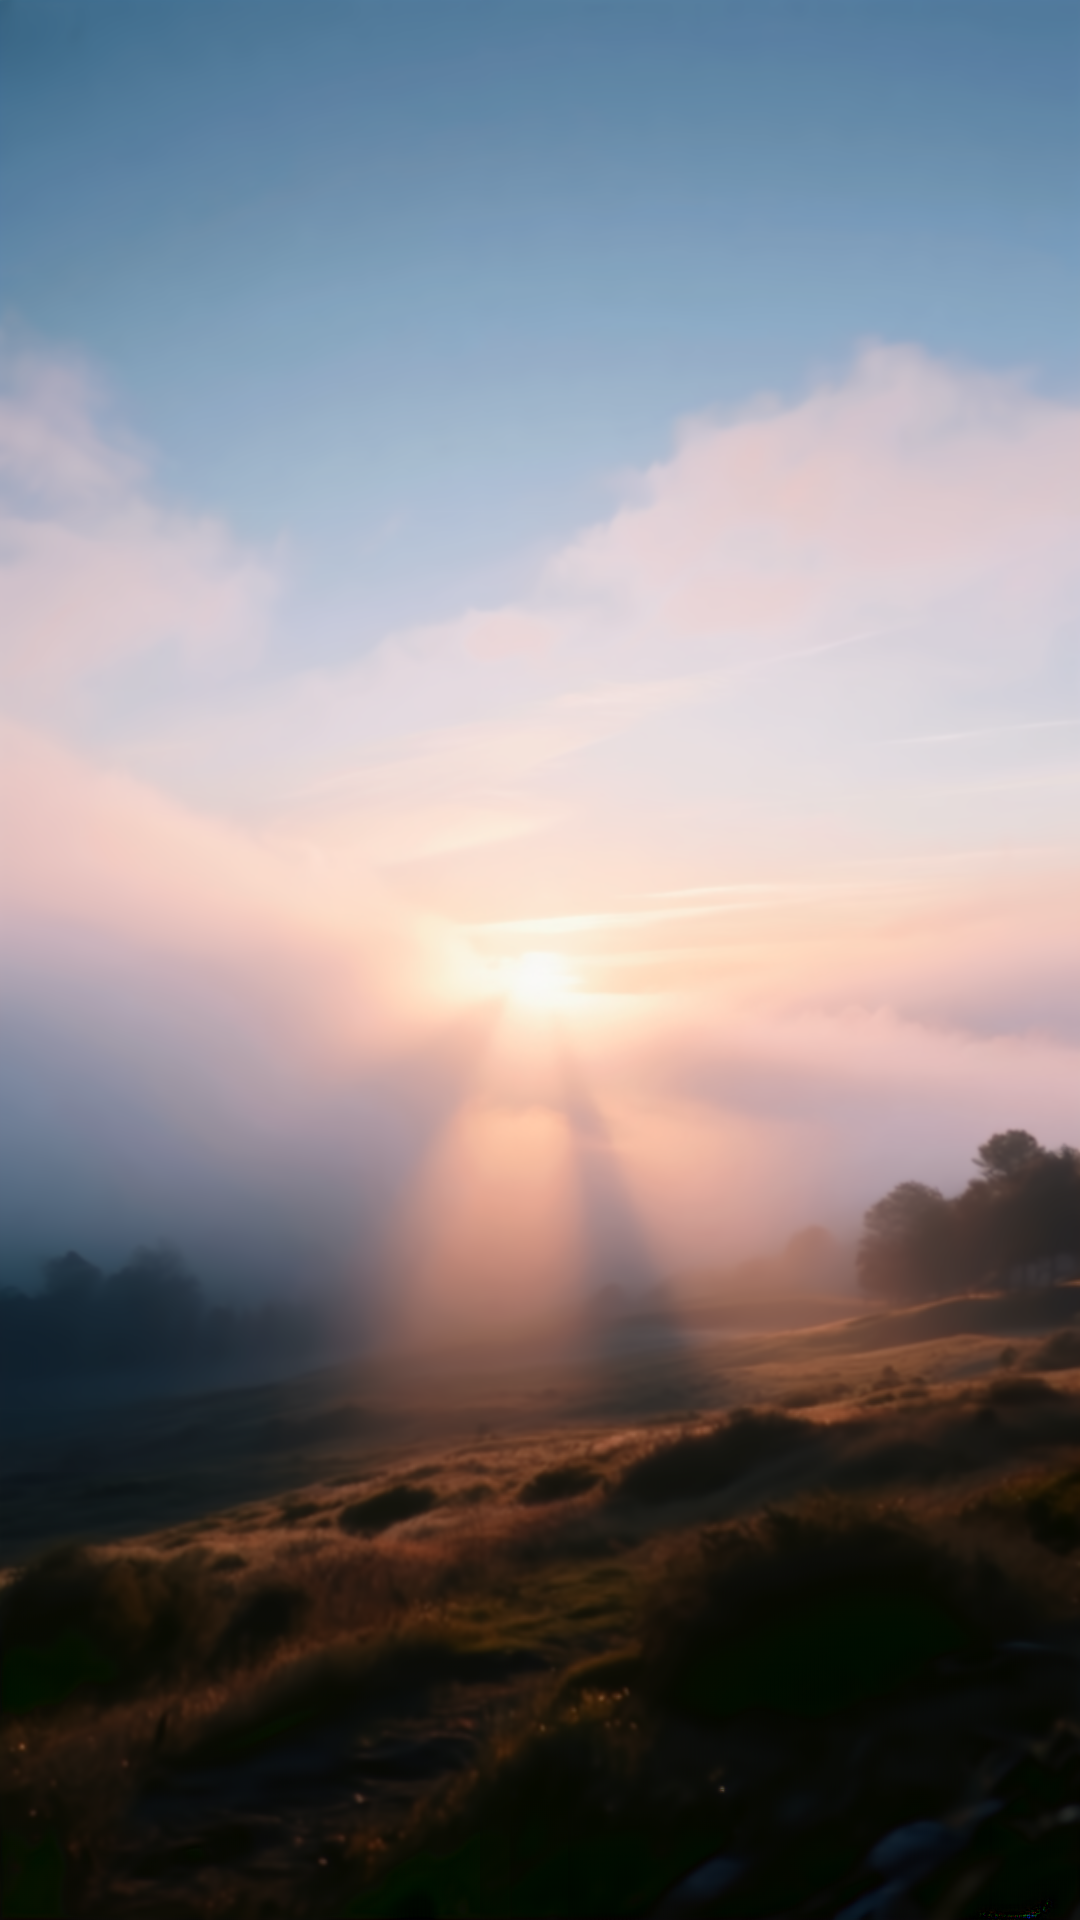

In [27]:
#Tampilkan gambar
from IPython.display import Image, display
import os

result_dir = './results/Real_Denoising'
for fname in os.listdir(result_dir):
    if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        display(Image(filename=os.path.join(result_dir, fname)))

In [28]:
#nama results
!ls ./results/Real_Denoising

'20250630_095343 (1) (1).png'


In [29]:
#download
from google.colab import files

# Ganti nama file hasil sesuai hasil dari perintah ls
files.download('./results/Real_Denoising/namaresults.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>